In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import recall_score,precision_score,f1_score,accuracy_score, confusion_matrix, classification_report

In [2]:
# importing dataset
df= pd.read_csv('Kiln Process & QC parameter.csv')

In [3]:
df

,Unnamed: 0,Kiln Feed,Speed,Torque,BZT,F.CaO,SiO2,Al2O3,Fe2O3,CaO,...,SO3.2,Blaines,R45,NC,IST,FST,1 d,3 d,7 d,28 d
0,NaN,t/h,rpm,KW,Deg.C,%,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,02-04-22,666,4,633,1127,1.05,13.24,3.37,2.27,41.19,...,1.89,238.0,22.5,25.50,125.0,175.0,28.7,44.4,52.1,63.1
2,03-04-22,665,3,608,1181,1.17,13.16,3.27,2.25,41.21,...,2.23,237.0,20.1,25.25,115.0,170.0,29.5,46.0,52.4,62.4
3,04-04-22,667,4,595,1068,0.96,13.17,3.38,2.28,40.82,...,2.34,235.0,21.5,26.50,125.0,165.0,30.0,46.6,54.1,61.3
4,05-04-22,667,4,587,991,1.21,13.00,3.27,2.27,41.00,...,2.49,245.0,21.2,26.25,125.0,165.0,29.8,43.4,53.4,61.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,28-06-22,637,3,530,1116,1.36,13.70,3.40,2.34,41.61,...,2.55,245.0,25.0,25.25,125.0,175.0,28.3,0.0,0.0,NaN
60,06-05-22,656,3,610,1017,1.11,12.90,2.98,2.18,42.04,...,2.57,242.0,21.5,25.00,120.0,175.0,27.6,46.6,54.4,63.8
61,06-06-22,651,4,703,1169,1.04,13.84,3.52,2.43,41.05,...,2.83,241.0,24.5,25.00,135.0,185.0,28.1,41.0,53.9,NaN
62,14-06-22,652,4,686,1159,1.01,13.86,3.51,2.35,41.22,...,2.32,234.0,22.5,26.25,110.0,160.0,29.8,43.6,51.0,NaN


In [4]:
df = df.drop(labels=0, axis=0)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63 entries, 1 to 63
Data columns (total 57 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  63 non-null     object 
 1   Kiln Feed   63 non-null     object 
 2   Speed       63 non-null     object 
 3   Torque      63 non-null     object 
 4   BZT         63 non-null     object 
 5   F.CaO       63 non-null     object 
 6   SiO2        63 non-null     float64
 7   Al2O3       63 non-null     float64
 8   Fe2O3       63 non-null     float64
 9   CaO         63 non-null     float64
 10  MgO         63 non-null     float64
 11  SO3         63 non-null     float64
 12  Na2O        63 non-null     float64
 13  K2O         63 non-null     float64
 14  R90         59 non-null     float64
 15  R212        59 non-null     float64
 16  C3S_dum     62 non-null     float64
 17  C2S_dum     62 non-null     float64
 18  C3A_dum     62 non-null     float64
 19  C4AF_dum    62 non-null     flo

In [6]:
print(" the missing values are:\n",df.isnull().sum())

 the missing values are:
 Unnamed: 0     0
Kiln Feed      0
Speed          0
Torque         0
BZT            0
F.CaO          0
SiO2           0
Al2O3          0
Fe2O3          0
CaO            0
MgO            0
SO3            0
Na2O           0
K2O            0
R90            4
R212           4
C3S_dum        1
C2S_dum        1
C3A_dum        1
C4AF_dum       1
Alite_SUM      1
Belite_sum     1
Alum_sum       1
Ferrite        2
FCaO           2
LIQ 1400       1
LS             0
SM             0
AM             0
SiO2.1         0
Al2O3.1        0
Fe2O3.1        0
CaO.1          0
MgO.1          0
SO3.1          0
Na2O.1         0
K2O.1          0
F.CaO.1        0
I.R            0
LS.1           0
SM.1           0
AM.1           0
C3S            0
C2S            0
C3A            0
C4AF           0
LIQ 1400.1     0
SO3.2          0
Blaines        0
R45            0
NC             0
IST            0
FST            0
1 d            0
3 d            0
7 d            0
28 d          22
dtype

In [7]:
df= df.drop(['Unnamed: 0'], axis = 1)

In [8]:
df= df.drop(['C3S_dum','C2S_dum'], axis = 1)

In [9]:
df= df.drop(['C3A_dum','C4AF_dum'], axis = 1)
df= df.drop(['Blaines','R45',"NC",'IST','FST','1 d','3 d','7 d','28 d'], axis = 1)

In [10]:
df= df.drop(['F.CaO','SiO2',"Al2O3",'Fe2O3','CaO','MgO','SO3','Na2O','K2O'], axis = 1)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63 entries, 1 to 63
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Kiln Feed   63 non-null     object 
 1   Speed       63 non-null     object 
 2   Torque      63 non-null     object 
 3   BZT         63 non-null     object 
 4   R90         59 non-null     float64
 5   R212        59 non-null     float64
 6   Alite_SUM   62 non-null     float64
 7   Belite_sum  62 non-null     float64
 8   Alum_sum    62 non-null     float64
 9   Ferrite     61 non-null     float64
 10  FCaO        61 non-null     float64
 11  LIQ 1400    62 non-null     float64
 12  LS          63 non-null     object 
 13  SM          63 non-null     object 
 14  AM          63 non-null     object 
 15  SiO2.1      63 non-null     float64
 16  Al2O3.1     63 non-null     float64
 17  Fe2O3.1     63 non-null     float64
 18  CaO.1       63 non-null     float64
 19  MgO.1       63 non-null     flo

In [12]:
df = df.astype(float, errors = 'raise')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63 entries, 1 to 63
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Kiln Feed   63 non-null     float64
 1   Speed       63 non-null     float64
 2   Torque      63 non-null     float64
 3   BZT         63 non-null     float64
 4   R90         59 non-null     float64
 5   R212        59 non-null     float64
 6   Alite_SUM   62 non-null     float64
 7   Belite_sum  62 non-null     float64
 8   Alum_sum    62 non-null     float64
 9   Ferrite     61 non-null     float64
 10  FCaO        61 non-null     float64
 11  LIQ 1400    62 non-null     float64
 12  LS          63 non-null     float64
 13  SM          63 non-null     float64
 14  AM          63 non-null     float64
 15  SiO2.1      63 non-null     float64
 16  Al2O3.1     63 non-null     float64
 17  Fe2O3.1     63 non-null     float64
 18  CaO.1       63 non-null     float64
 19  MgO.1       63 non-null     flo

In [14]:
df['R90'] = df['R90'].fillna(df['R90'].mean())
df['R212'] = df['R212'].fillna(df['R212'].mean())
df['Alite_SUM'] = df['Alite_SUM'].fillna(df['Alite_SUM'].mean())
df['Belite_sum'] = df['Belite_sum'].fillna(df['Belite_sum'].mean())
df['Alum_sum'] = df['Alum_sum'].fillna(df['Alum_sum'].mean())
df['Ferrite'] = df['Ferrite'].fillna(df['Ferrite'].mean())
df['FCaO'] = df['FCaO'].fillna(df['FCaO'].mean())
df['LIQ 1400'] = df['LIQ 1400'].fillna(df['LIQ 1400'].mean())


In [15]:
print(" the missing values are:\n",df.isnull().sum())

 the missing values are:
 Kiln Feed     0
Speed         0
Torque        0
BZT           0
R90           0
R212          0
Alite_SUM     0
Belite_sum    0
Alum_sum      0
Ferrite       0
FCaO          0
LIQ 1400      0
LS            0
SM            0
AM            0
SiO2.1        0
Al2O3.1       0
Fe2O3.1       0
CaO.1         0
MgO.1         0
SO3.1         0
Na2O.1        0
K2O.1         0
F.CaO.1       0
I.R           0
LS.1          0
SM.1          0
AM.1          0
C3S           0
C2S           0
C3A           0
C4AF          0
LIQ 1400.1    0
SO3.2         0
dtype: int64


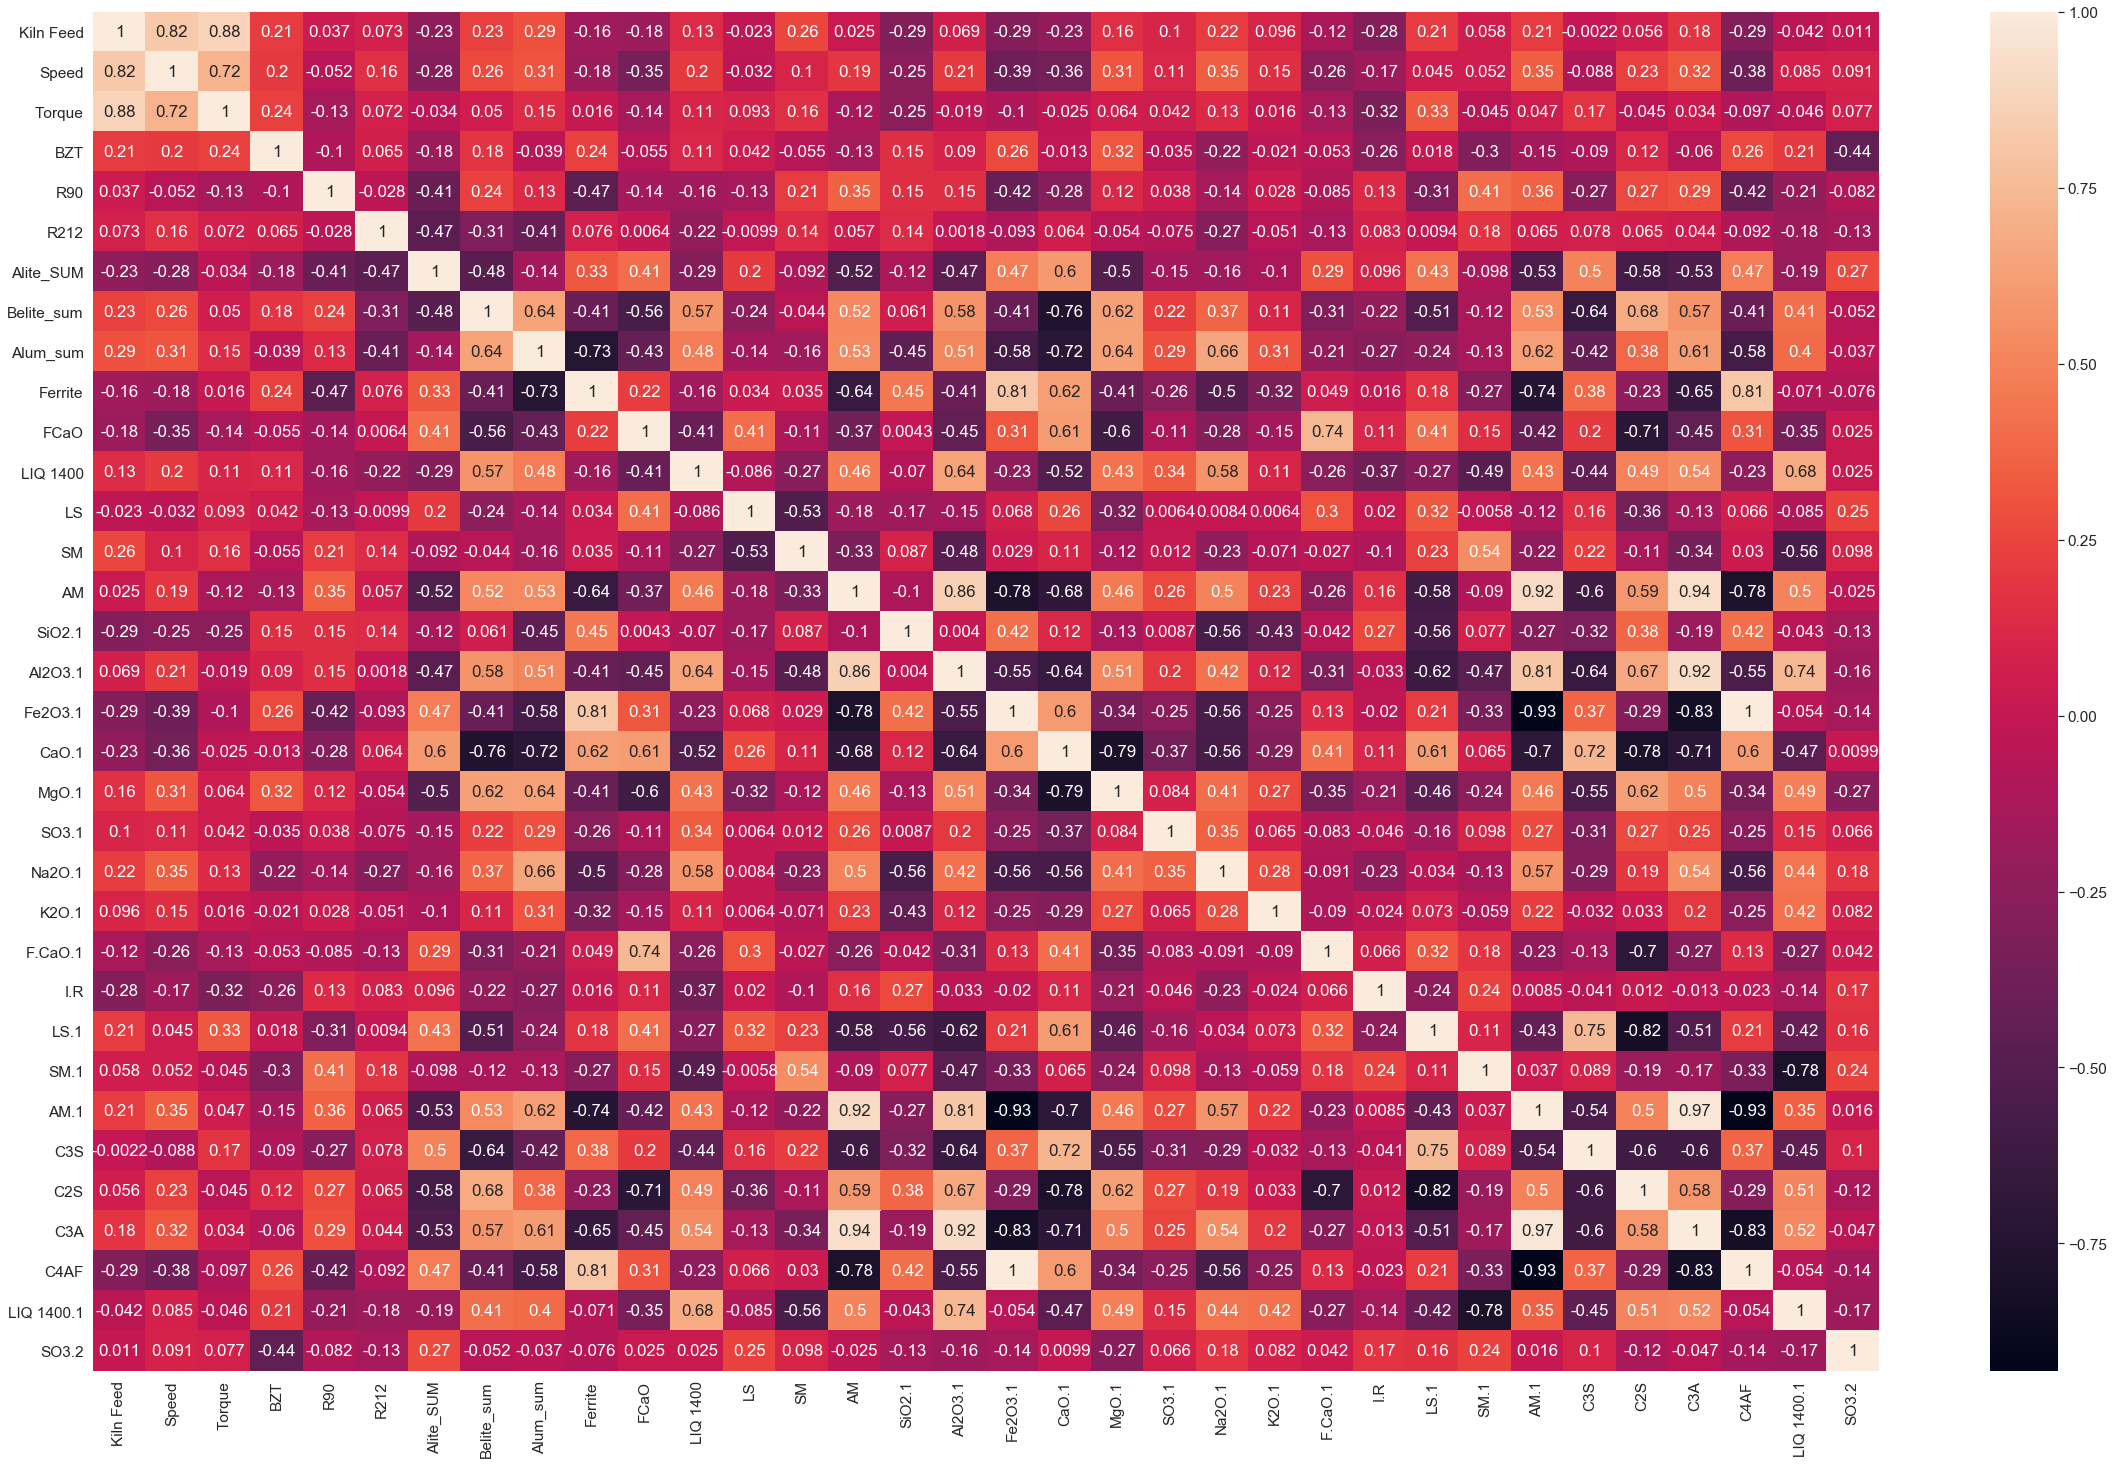

In [25]:
plt.figure(figsize = (40, 25))
sns.set(font_scale=1.4)
sns.heatmap(df.corr(), annot = True)

In [18]:
cor=df.corr(method="spearman")
print(cor)

            Kiln Feed     Speed    Torque       BZT       R90      R212  \
Kiln Feed    1.000000  0.788693  0.605886  0.343539  0.164213 -0.252699   
Speed        0.788693  1.000000  0.542097  0.284223  0.051810 -0.298483   
Torque       0.605886  0.542097  1.000000  0.480116 -0.127011 -0.190128   
BZT          0.343539  0.284223  0.480116  1.000000 -0.195557 -0.216184   
R90          0.164213  0.051810 -0.127011 -0.195557  1.000000  0.201411   
R212        -0.252699 -0.298483 -0.190128 -0.216184  0.201411  1.000000   
Alite_SUM   -0.410825 -0.297509 -0.042227 -0.192853 -0.503584  0.186188   
Belite_sum   0.331497  0.233790  0.031375  0.129975  0.427801 -0.237809   
Alum_sum     0.342338  0.264897  0.069572  0.088501  0.459483 -0.314555   
Ferrite     -0.133012 -0.125131  0.193696  0.131213 -0.614959  0.088798   
FCaO        -0.336219 -0.443140 -0.256053 -0.154922 -0.265674  0.353142   
LIQ 1400     0.222480  0.257600  0.196315  0.171523 -0.030900 -0.473277   
LS          -0.083935 -0.

In [21]:
cor1=df.corr(method="pearson")
print(cor1)

            Kiln Feed     Speed    Torque       BZT       R90      R212  \
Kiln Feed    1.000000  0.820287  0.878394  0.209359  0.036759  0.072857   
Speed        0.820287  1.000000  0.715758  0.204503 -0.051935  0.156278   
Torque       0.878394  0.715758  1.000000  0.235381 -0.134473  0.072350   
BZT          0.209359  0.204503  0.235381  1.000000 -0.099986  0.065469   
R90          0.036759 -0.051935 -0.134473 -0.099986  1.000000 -0.028417   
R212         0.072857  0.156278  0.072350  0.065469 -0.028417  1.000000   
Alite_SUM   -0.233395 -0.279078 -0.033856 -0.181945 -0.405614 -0.467688   
Belite_sum   0.226971  0.263916  0.050134  0.179737  0.235544 -0.305506   
Alum_sum     0.292200  0.308041  0.146032 -0.039451  0.132492 -0.409548   
Ferrite     -0.160063 -0.184251  0.016076  0.237628 -0.473104  0.076470   
FCaO        -0.177830 -0.348394 -0.138892 -0.055340 -0.144671  0.006428   
LIQ 1400     0.132932  0.203580  0.105536  0.110145 -0.159688 -0.219934   
LS          -0.022525 -0.